In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
def get_calib_dat(file_name,beg_pts,end_pts):
    with open('./calibrations_raw_dat/'+file_name+'.txt','r') as f_open:
        raw_cal = f_open.read()

    raw_cal_hdr = raw_cal.split('\n')[0:10]
    raw_cal_dat = raw_cal.split('\n')[10::]

    dat = [x.split(',') for x in raw_cal_dat]
    dat = np.array([a for b in dat for a in b])[0:-1].astype('f')

    volt = dat[0::2]
    disp = dat[1::2]

    z = np.polyfit(volt[beg_pts:end_pts], disp[beg_pts:end_pts], 1)
    cal = np.poly1d(z)

    calibration,_ = np.abs(cal)
    calibration

    R2 = r2_score(disp[beg_pts:end_pts],cal(volt[beg_pts:end_pts]))

    xp = np.linspace(-15, 15, 100)

    #############################################################################################################

    fig, ax = plt.subplots(figsize=(5, 5),dpi=100)

    ax.scatter(volt, disp,color='r')
    ax.plot(xp, cal(xp), 'k-', label='calibration = '+str(calibration)+'\n$R^2$ = '+str(np.round(R2,5)))

    plt.xlabel('Volt'), plt.ylabel('displacement (mm)')
    plt.xlim([min(volt)+0.05*min(volt),max(volt)+0.05*max(volt)])
    plt.title(file_name)

    plt.legend()
    plt.show()

    return calibration, R2

In [3]:
filenames = np.array(['tt244_lr_hg_27Jan2021','tt244_lr_lg_27Jan2021',
'tt244_sr_hg_27Jan2021','tt244_sr_lg_27Jan2021',
'tt245_hg_cal_07Feb2021','tt245_lg_cal_07Feb2021','tt245_lg2_cal_07Feb2021'])

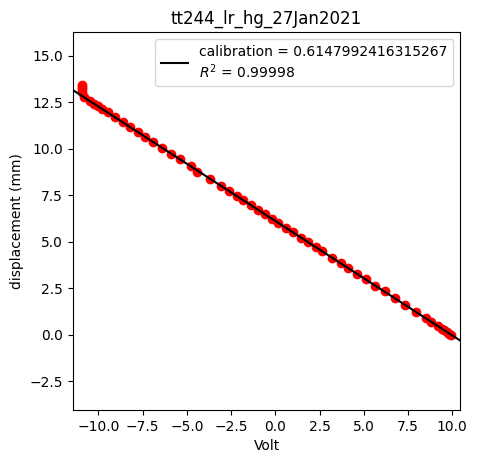

(0.6147992416315267, 0.9999839073621841)

In [4]:
get_calib_dat(filenames[0],0,-4)

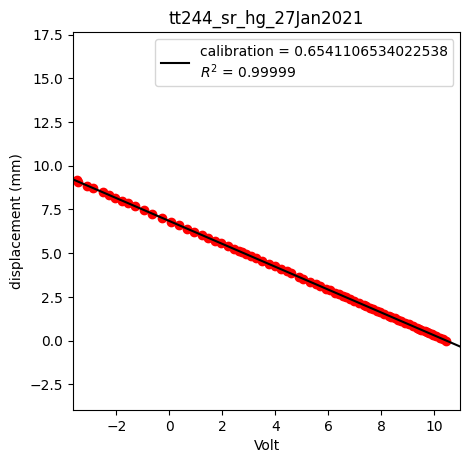

(0.6541106534022538, 0.9999877506280186)

In [5]:
get_calib_dat(filenames[2],0,-1)

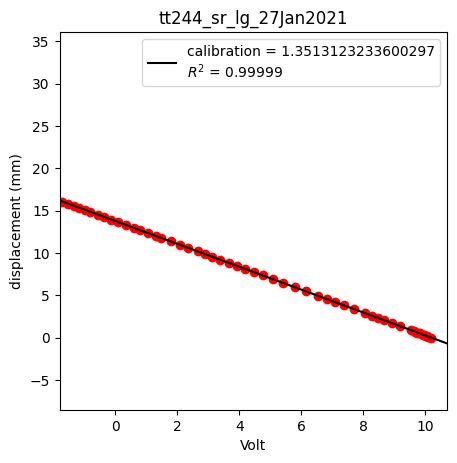

(1.3513123233600297, 0.9999876480908618)

In [6]:
get_calib_dat(filenames[3],0,-2)

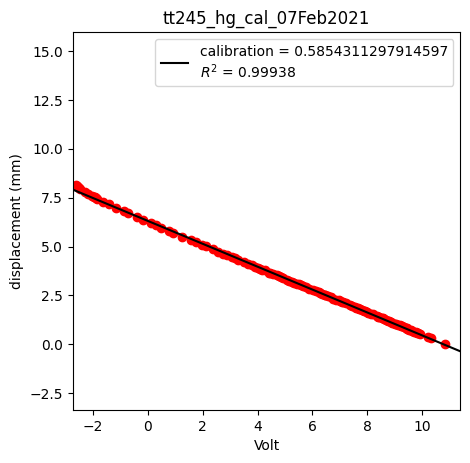

(0.5854311297914597, 0.9993849418968367)

In [7]:
get_calib_dat(filenames[4],0,-2)

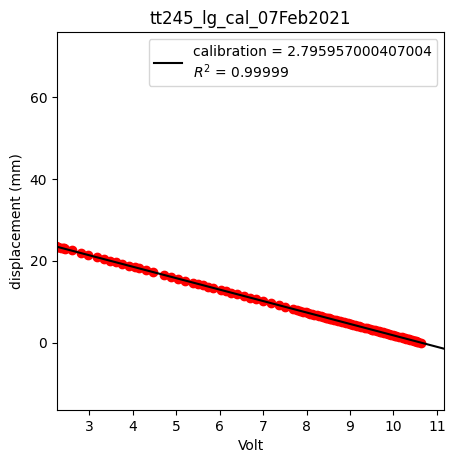

(2.795957000407004, 0.9999914667027857)

In [8]:
get_calib_dat(filenames[5],0,-2)